# Курсовая работа на тему Анализ поставщиков Alibaba методами Big Data.
# Кочетков Максим, группа ШАД-212, РУТ Академия "ВИШ"

# Библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

## Описание переменных выборки.

* **product_name**(Товар) - строка, имя товара на сайте Алибаба.
* **category**(Категория товара) - строка, категория, к которой относится товар.
* **supplier_name**(Поставщик) - строка, имя поставщика.
* **supplier_category**(Описание) - строка, категория поставщика.
* **is_verified**(Проверен(да/нет)) - числовые значения 1-да или 0-нет, есть ли у поставщика плашка "верифицирован" на сайте Алибаба.
* **supplier_experience**(Стаж поставщика) - число, обозначающее, сколько лет поставщик находится на платформе Алибаба.
* **supplier_rate**(Рейтинг поставщика) - число с плавающей точкой, рейтинг поставщика на платформе от 0 до 5, формируется из отзывов пользователей.
* **response_speed**(Скорость ответа) - число, максимальное количество часов, за которое обычно поставщик отвечает клиенту.
* **on-time_delivery**(Своевременность доставки(%)) - число с плавающей точкой, процент своевременно доставленных поставщиком грузов.
* **on-time_shipment_guarantee**(Гарантия своевременной отгрузки(да/нет)) - числовые значения 1-да или 0-нет, есть ли у поставщика гарантия своевременной отгрузки.
* **easy_return**(Упрощенный возврат(да/нет)) - числовые значения 1-да или 0-нет, есть ли у поставщика опция упрощенного возрата.
* **min_count**(Мин. кол-во в заказе) - число, минимальное количество товара в оптовой закупке.
* **max_count**(Макс. кол-во в заказе) - число, максимальное количество товара в оптовой закупке.
* **mean_count**(Среднее кол-во в заказе) - число, среднее количество товара в оптовой закупке.
* **min_price**(Минимальная цена) - число с плавающей точкой, минимальная цена за единицу товара.
* **max_price**(Максимальная цена) - число с плавающей точкой, максимальная цена за единицу товара.
* **mean_price**(Средняя цена) - число с плавающей точкой, средняяя цена за единицу товара.

In [19]:
url = 'alibaba.csv'
df = pd.read_csv(url)
df.head()

,product_name,category,supplier_name,supplier_category,is_verified,supplier_experience,supplier_rate,response_speed,on-time_delivery,on-time_shipment_guarantee,easy_return,min_count,max_count,mean_count,min_price,max_price,mean_price
0,2023 детская пустышка,Другая бытовая электроника,"Shenzhen ESYS Electronics Co., Ltd.",Manufacturer,0,12,4.8,3,100.0,1,1,100.0,1000.0,550.0,9.0,12.0,10.0
1,Оптовая продажа Jakcom R3 умное кольцо Бытовая...,Другая бытовая электроника,"Shanxi Jakcom Technology Co., Ltd.",Trading Company,0,9,4.4,3,91.4,1,0,1.0,3000.0,1500.0,7.0,19.0,13.0
2,"2021 другая Бытовая электроника, лидер продаж,...",Другая бытовая электроника,"Xiamen Paltier Electronic Technology Co., Ltd.","Manufacturer,Trading Company",0,7,0.0,10,80.0,1,0,1000.0,10000.0,5500.0,11.0,13.0,12.0
3,"Оптовая продажа, универсальные аксессуары для ...",Другая бытовая электроника,"Dongguan Longrich Electronic Co., Ltd.",Производитель товаров по индивидуальному заказу,1,19,5.0,6,100.0,1,0,2.0,500.0,251.0,2.0,4.0,3.0
4,"Лидер продаж, универсальный стабилизатор G6MAX...",Другая бытовая электроника,"Foshan City Gaoming District Mibohe Trade Co.,...",Многопрофильный поставщик,1,8,4.9,6,100.0,1,0,2.0,20.0,11.0,223.0,279.0,251.0


# EDA

## Общий вид исходного датафрейма.

In [3]:
df.shape

(18100, 17)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_name                18100 non-null  object 
 1   category                    18100 non-null  object 
 2   supplier_name               18100 non-null  object 
 3   supplier_category           18100 non-null  object 
 4   is_verified                 18100 non-null  int64  
 5   supplier_experience         18100 non-null  int64  
 6   supplier_rate               18100 non-null  float64
 7   response_speed              18100 non-null  int64  
 8   on-time_delivery            18097 non-null  float64
 9   on-time_shipment_guarantee  18100 non-null  int64  
 10  easy_return                 18100 non-null  int64  
 11  min_count                   18100 non-null  float64
 12  max_count                   18100 non-null  float64
 13  mean_count                  181

In [5]:
df.dtypes

product_name                   object
category                       object
supplier_name                  object
supplier_category              object
is_verified                     int64
supplier_experience             int64
supplier_rate                 float64
response_speed                  int64
on-time_delivery              float64
on-time_shipment_guarantee      int64
easy_return                     int64
min_count                     float64
max_count                     float64
mean_count                    float64
min_price                     float64
max_price                     float64
mean_price                    float64
dtype: object

#### Промежуточные выводы

Исходный датафрейм состоит из 18100 строк и 17 столбцов.

## Работа с нулевыми значениями и дубликатами.

In [6]:
print(f'Сумма дубликатов: {df.duplicated().sum()} \nСумма нулевых значений: \n{df.isnull().sum()}')

Сумма дубликатов: 195 
Сумма нулевых значений: 
product_name                  0
category                      0
supplier_name                 0
supplier_category             0
is_verified                   0
supplier_experience           0
supplier_rate                 0
response_speed                0
on-time_delivery              3
on-time_shipment_guarantee    0
easy_return                   0
min_count                     0
max_count                     0
mean_count                    0
min_price                     0
max_price                     0
mean_price                    0
dtype: int64


In [7]:
df = df.dropna()
df = df.drop_duplicates()

In [8]:
print(f'Сумма дубликатов: {df.duplicated().sum()} \nСумма нулевых значений: \n{df.isnull().sum()}')

Сумма дубликатов: 0 
Сумма нулевых значений: 
product_name                  0
category                      0
supplier_name                 0
supplier_category             0
is_verified                   0
supplier_experience           0
supplier_rate                 0
response_speed                0
on-time_delivery              0
on-time_shipment_guarantee    0
easy_return                   0
min_count                     0
max_count                     0
mean_count                    0
min_price                     0
max_price                     0
mean_price                    0
dtype: int64


In [9]:
df.shape

(17902, 17)

#### Промежуточные выводы

В наборе данных было найдено 195 дублирующихся строк, которые были удалены. Также было найдено 3 нулевых значения в столбце on-time_delivery. Принятно решение удалить строки с нулевыми значениями, так как их слишком мало для того, чтобы заполнять их какими-либо значениями, и их отсутствие сильно не повлиет на проведение дальнейшего анализа.

## Проверка на аномалии.

In [207]:
def check_positive(columns):
    '''
    Процедура принимает названия столбцов, в которых все значения должны быть больше нуля.
    Если аномалий не было найдено, выводится строка 'Данные корректны',
    если аномалии были найдены, то выводится количество аномалий и имя столбца, в котором они были найдены.
    '''
    is_positive = True
    
    for column in columns:
        checking = (df[column] < 0).sum()
        if checking > 0:
            is_positive = False
            print(f'Количество аномальных значений в столбце {column}: {(df[column] < 0).sum()}')
            
    if is_positive:
        print('Данные корректны')


checking_columns = ['supplier_experience', 'supplier_rate', 'response_speed', 
                    'on-time_delivery', 'min_count', 'max_count', 'mean_count',
                    'min_price', 'max_price', 'mean_price']

check_positive(checking_columns)

Данные корректны


In [208]:
'''
Проверка, есть ли случаи, когда минимальное значение больше среднего, 
либо минимальное значение больше максимального, либо среднее значение больше максимального.
'''

incorrect_indexes = []
    
for index, row in df.iterrows():
    if row['min_count'] > row['mean_count'] or row['mean_count'] > row['max_count'] or row['min_count'] > row['max_count']:
        incorrect_indexes.append(index)
    if row['min_price'] > row['mean_price'] or row['mean_price'] > row['max_price'] or row['min_price'] > row['max_price']:
        incorrect_indexes.append(index)
            
if len(incorrect_indexes) == 0:
    print("Аномалий между минимальными, средними и максимальными значениями нет.")
else:
    print(f"Найдены аномалии между минимальными, средними и максимальными значениями в строках {incorrect_indexes}")

Аномалий между минимальными, средними и максимальными значениями нет.


In [209]:
# Рейтинг может быть минимально равен 0 и максимально равен 5.

min_rate = df['supplier_rate'].min()
max_rate = df['supplier_rate'].max()
print(f'Минимальный рейтинг: {min_rate}\nМаксимальный рейтинг: {max_rate}')

Минимальный рейтинг: 0.0
Максимальный рейтинг: 5.0


In [210]:
# Рейтинг своевременной доставки измеряется в %, он может принимать значения от 0 до 100

min_on_time = df['on-time_delivery'].min()
max_on_time = df['on-time_delivery'].max()
print(f'Минимальный рейтинг своевременной доставки: {min_on_time}\nМаксимальный рейтинг своевременной доставки: {max_on_time}')

Минимальный рейтинг своевременной доставки: 0.0
Максимальный рейтинг своевременной доставки: 100.0


#### Промежуточные выводы

Аномальных значений не найдено. Также на этапе работы с аномалиями можно было построить боксплоты для обнаружения выбросов, но в мне интересна общая ситуация по выборке, поэтому никакие значения, кроме нелогичных, отбрасываться не будут.

# Визуализации

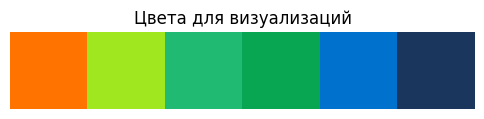

In [10]:
alibaba_orange = '#FF7300'
sber_spring = '#A0E720'
sber_emerald = '#21BA72'
sber_green = '#08a652'
miit_light_blue = '#0072CE'
miit_dark_blue = '#1B365D'
colors = [alibaba_orange, sber_spring, sber_emerald, sber_green, miit_light_blue, miit_dark_blue]

palette = sns.color_palette(colors)
sns.palplot(palette)

plt.title('Цвета для визуализаций')
plt.axis('off')
plt.show()

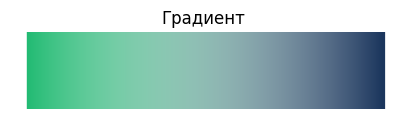

In [260]:
def make_gradient(color1, color2, middle_color, mix):
    color1 = np.array(mpl.colors.to_rgb(color1))
    color2 = np.array(mpl.colors.to_rgb(color2))
    middle_color = np.array(mpl.colors.to_rgb(middle_color))

    result_color1 = (1 - mix) * color1 + mix * middle_color
    result_color2 = (1 - mix) * middle_color + mix * color2
    result_color = (1 - mix) * result_color1 + mix * result_color2

    return mpl.colors.to_hex(result_color)

def make_palette(color1, color2, middle_color, number_of_colors):
    gradient_palette = [make_gradient(color1, color2, middle_color, x / number_of_colors) for x in range(number_of_colors)]
    return sns.color_palette(gradient_palette)

palette_gradient = make_palette(sber_emerald, miit_dark_blue, '#FFFFFF', 2000)

plt.figure(figsize=(5, 1))
for x in range(2000):
    plt.axvline(x, color=palette_gradient[x])

plt.title('Градиент')
plt.axis('off')
plt.show()

In [11]:
# Разделение датафрейма на проверенных и непроверенных поставщиков

df_verified = df[df['is_verified'] == 1]
df_unverified = df[df['is_verified'] == 0]

In [12]:
df_verified.shape

(6109, 17)

In [13]:
df_unverified.shape

(11793, 17)

### Корреляционная матрица

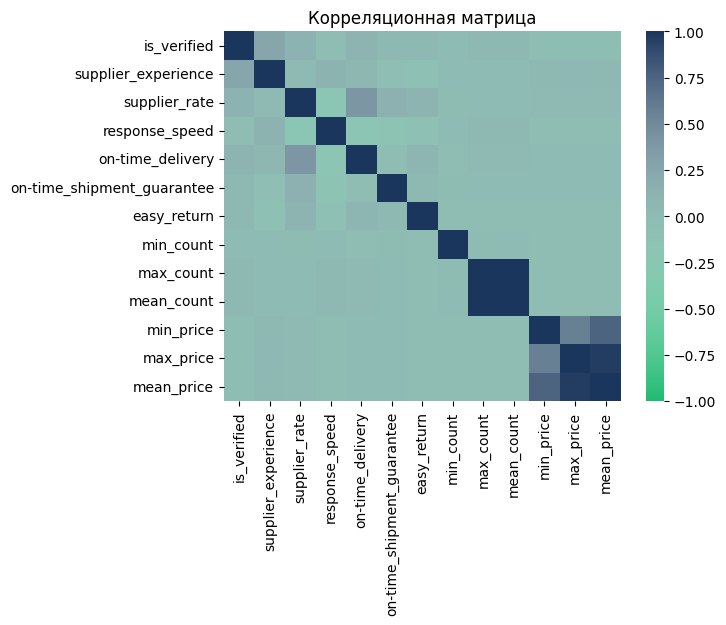

In [218]:
columns = df.columns
corr = df[columns[4:]].corr().T
sns.heatmap(corr, cmap=palette_gradient, vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

### Вывод

По корреляционной матрице можно сделать вывод, что наиболее коррелирующими с переменной is_verified оказались переменные supplier_experience (стаж поставщика), supplier_rate (рейтинг поставщика), on-time_delivery (процент своевременной доставки). Наиболее коррелирующими с переменной supplier_rate оказались on-time_delivery, on-time_shipment_guarantee (гарантия своевременной отгрузки) и easy_return (опция легкого возврата товара).

# Распределение верифицированных и неверифицированных поставщиков

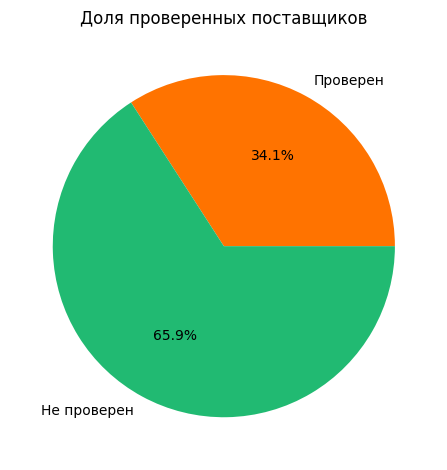

In [284]:
verified = [(df['is_verified'] == 1).sum(), (df['is_verified'] == 0).sum()]

plt.pie(verified, labels=['Проверен', 'Не проверен'], autopct='%1.1f%%', colors=[palette[0], palette[2]], wedgeprops = {'linewidth': 0})
plt.title('Доля проверенных поставщиков')
plt.tight_layout()
plt.show()

### Вывод

Из круговой диаграммы видно, что только 34.1% поставщиков проверены сервисом Alibaba.

### Графики распределения количества поставщиков по годам опыта.

In [220]:
df_suppliers_experience = df[['supplier_name', 'supplier_experience']].drop_duplicates()
df_verified_suppliers_experience = df_verified[['supplier_name', 'supplier_experience']].drop_duplicates()
df_unverified_suppliers_experience = df_unverified[['supplier_name', 'supplier_experience']].drop_duplicates()

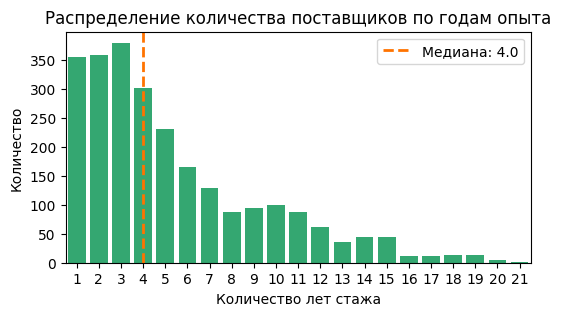

In [282]:
plt.figure(figsize=(6, 3))

sns.countplot(df_suppliers_experience, x='supplier_experience', color=palette[2])

median_value = df_suppliers_experience['supplier_experience'].median()
plt.axvline(x=median_value-1 , color=palette[0], linestyle='dashed', linewidth=2, label=f'Медиана: {median_value}')
plt.legend()

plt.title('Распределение количества поставщиков по годам опыта')
plt.xlabel('Количество лет стажа')
plt.ylabel('Количество')
plt.tick_params(axis='x', rotation=0)
plt.show()

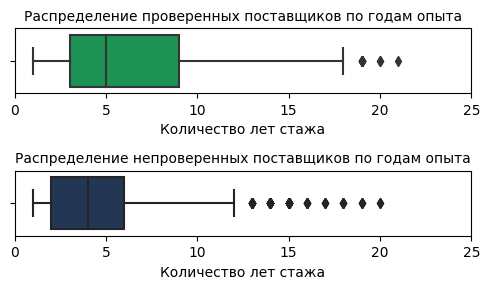

In [281]:
fig, axes = plt.subplots(2, 1, figsize=(5, 3))

sns.boxplot(data=df_verified_suppliers_experience, x='supplier_experience', ax=axes[0], color=palette[3])
axes[0].set_title('Распределение проверенных поставщиков по годам опыта', fontdict={'fontsize': 10})
axes[0].set_xlabel('Количество лет стажа')
axes[0].set_xlim(0, 25)

sns.boxplot(data=df_unverified_suppliers_experience, x='supplier_experience', ax=axes[1], color=palette[5])
axes[1].set_title('Распределение непроверенных поставщиков по годам опыта', fontdict={'fontsize': 10})
axes[1].set_xlabel('Количество лет стажа')
axes[1].set_xlim(0, 25)

plt.tight_layout()
plt.show()

### Вывод 

Из столбчатой диаграммы можно сделать вывод, что большая часть поставщиков имеет стаж от 1 до 10 лет, в том числе половина из них имеет стаж до 4 лет.
В то же время набоксплотах  видно, что в основном количество лет опыта больше у проверенных поставщиков. У непроверенных поставщиков большая часть значений лежит в промежутке от 2 до 6 лет, а у проверенных от 3 до 9. По медиане бокс плота можно сказать, что из проверенных поставщиков половина имеет стаж больше 5 лет


### Графики распределения оценок поставщиков

In [14]:
df_suppliers_rate = df[['supplier_name', 'supplier_rate']].drop_duplicates()
df_verified_suppliers_rate = df_verified[['supplier_name', 'supplier_rate']].drop_duplicates()
df_unverified_suppliers_rate = df_unverified[['supplier_name', 'supplier_rate']].drop_duplicates()

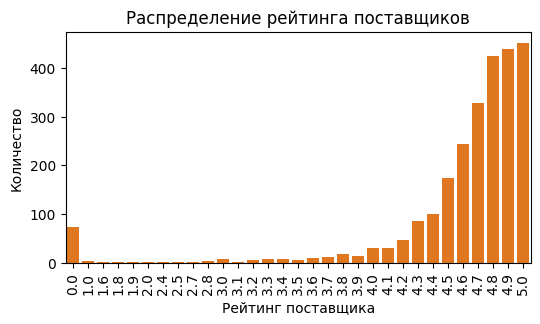

In [15]:
plt.figure(figsize=(6, 3))

sns.countplot(df_suppliers_rate, x='supplier_rate', color=palette[0])

plt.title('Распределение рейтинга поставщиков')
plt.xlabel('Рейтинг поставщика')
plt.ylabel('Количество')
plt.tick_params(axis='x', rotation=90)
plt.show()

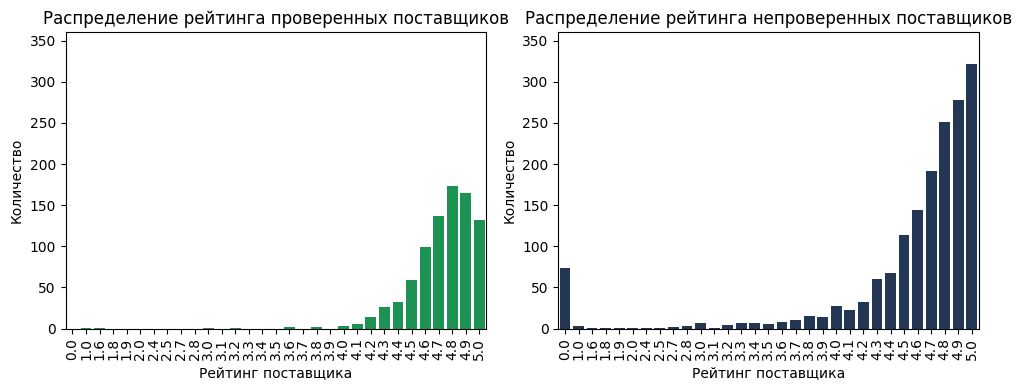

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x_values = sorted(df_suppliers_rate['supplier_rate'].unique())

sns.countplot(data=df_verified_suppliers_rate, x='supplier_rate', order=x_values, ax=axes[0], color=palette[3])
axes[0].set(title='Распределение рейтинга проверенных поставщиков', xlabel='Рейтинг поставщика', ylabel='Количество', ylim=(0, 360))
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(data=df_unverified_suppliers_rate, x='supplier_rate', order=x_values, ax=axes[1], color=palette[5])
axes[1].set(title='Распределение рейтинга непроверенных поставщиков', xlabel='Рейтинг поставщика', ylabel='Количество', ylim=(0, 360))
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Вывод 

Графики распределения оценок поставщиков демонстрируют, что обе группы в основном получают высокие оценки, в пределах 4–5. Однако у непроверенных поставщиков больше оценок от 1.9 до 4, и около 75 поставщиками не имеют оценок. Это подчеркивает, что выбор верифицированных поставщиков является более надежным.

### Графики распределения времени ответа поставщиков.

In [226]:
df_suppliers_answer_time = df[['supplier_name', 'response_speed']].drop_duplicates()
df_verified_suppliers_answer_time = df_verified[['supplier_name', 'response_speed']].drop_duplicates()
df_unverified_suppliers_answer_time = df_unverified[['supplier_name', 'response_speed']].drop_duplicates()

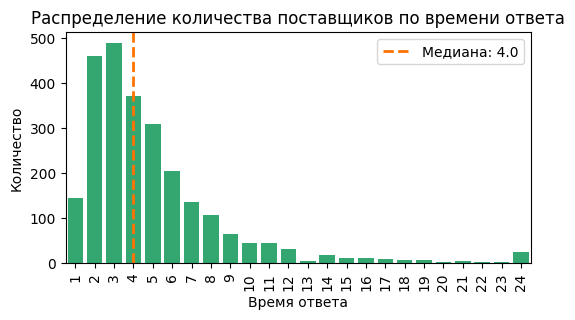

In [278]:
plt.figure(figsize=(6, 3))

sns.countplot(df_suppliers_answer_time, x='response_speed', color=palette[2])

median_value = df_suppliers_answer_time['response_speed'].median()
plt.axvline(x=median_value-1 , color=palette[0], linestyle='dashed', linewidth=2, label=f'Медиана: {median_value}')
plt.legend()

plt.title('Распределение количества поставщиков по времени ответа')
plt.xlabel('Время ответа')
plt.ylabel('Количество')
plt.tick_params(axis='x', rotation=90)
plt.grid(False)
plt.show()

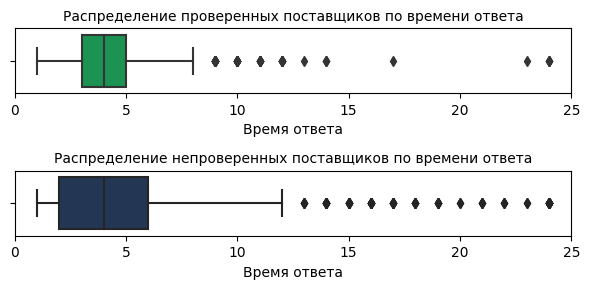

In [277]:
fig, axes = plt.subplots(2, 1, figsize=(6, 3))

sns.boxplot(data=df_verified_suppliers_answer_time, x='response_speed', ax=axes[0], color=palette[3])
axes[0].set_title('Распределение проверенных поставщиков по времени ответа', fontdict={'fontsize': 10})
axes[0].set_xlabel('Время ответа')
axes[0].set_xlim(0, 25)

sns.boxplot(data=df_unverified_suppliers_answer_time, x='response_speed', ax=axes[1], color=palette[5])
axes[1].set_title('Распределение непроверенных поставщиков по времени ответа', fontdict={'fontsize': 10})
axes[1].set_xlabel('Время ответа')
axes[1].set_xlim(0, 25)

plt.tight_layout()
plt.show()

### Вывод

На основе графиков можно сделать вывод, что большая часть поставщиков связывается с клиентами в течение 3–5  часов. Также благодаря боксплотам видно, что разброс по времени ответа у непроверенных поставщиков больше, поэтому обращаясь к проверенным поставщикам шанс на быструю услугу больше.

## Распределение по проценту своевременной доставки

In [229]:
df_on_time = df[['supplier_name', 'on-time_delivery']].drop_duplicates()
df_verified_on_time = df_verified[['supplier_name', 'on-time_delivery']].drop_duplicates()
df_unverified_on_time = df_unverified[['supplier_name', 'on-time_delivery']].drop_duplicates()

In [230]:
df_on_time['on-time_delivery'] = df_on_time['on-time_delivery'].apply(lambda x: round(x, -1))
df_verified_on_time['on-time_delivery'] = df_verified_on_time['on-time_delivery'].apply(lambda x: round(x, -1))
df_unverified_on_time['on-time_delivery'] = df_unverified_on_time['on-time_delivery'].apply(lambda x: round(x, -1))

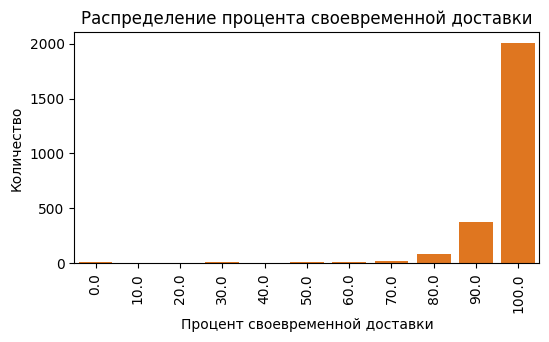

In [276]:
plt.figure(figsize=(6, 3))

sns.countplot(df_on_time, x='on-time_delivery', color=palette[0])

plt.title('Распределение процента своевременной доставки')
plt.xlabel('Процент своевременной доставки')
plt.ylabel('Количество')
plt.tick_params(axis='x', rotation=90)
plt.show()

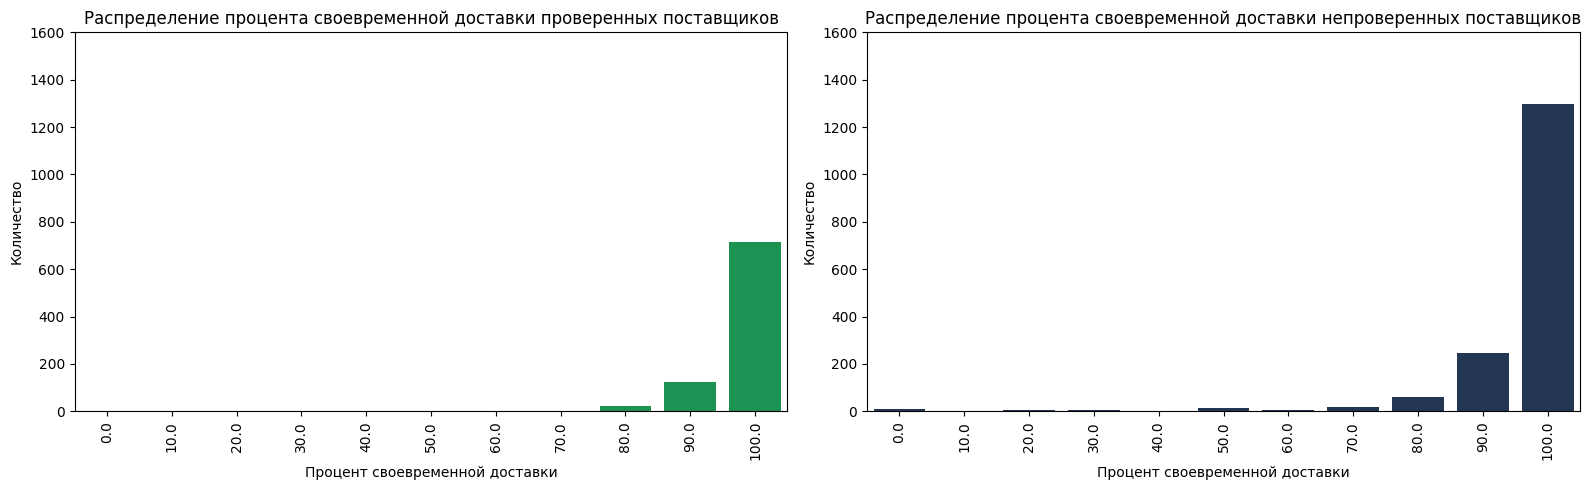

In [275]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

x_values = sorted(df_on_time['on-time_delivery'].unique())

sns.countplot(data=df_verified_on_time, x='on-time_delivery', order=x_values, ax=axes[0], color=palette[3])
axes[0].set(title='Распределение процента своевременной доставки проверенных поставщиков', xlabel='Процент своевременной доставки', ylabel='Количество', ylim=(0, 1600))
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(data=df_unverified_on_time, x='on-time_delivery', order=x_values, ax=axes[1], color=palette[5])
axes[1].set(title='Распределение процента своевременной доставки непроверенных поставщиков', xlabel='Процент своевременной доставки', ylabel='Количество', ylim=(0, 1600))
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Вывод

По графикам видно, что показатель своевременной доставки у поставщиков Alibaba в большинстве случаев находится в диапазоне от 90% до 100%. Однако среди непроверенных поставщиков встречаются случаи с процентом своевременной доставки ниже 50% и даже случаи с нулевым процентом своевременной доставки. Поэтому выбирая проверенных поставщиков вероятность встретиться с проблемой своевременности доставки ниже.

### Наличие товаров с опцией лёгкого возврата.

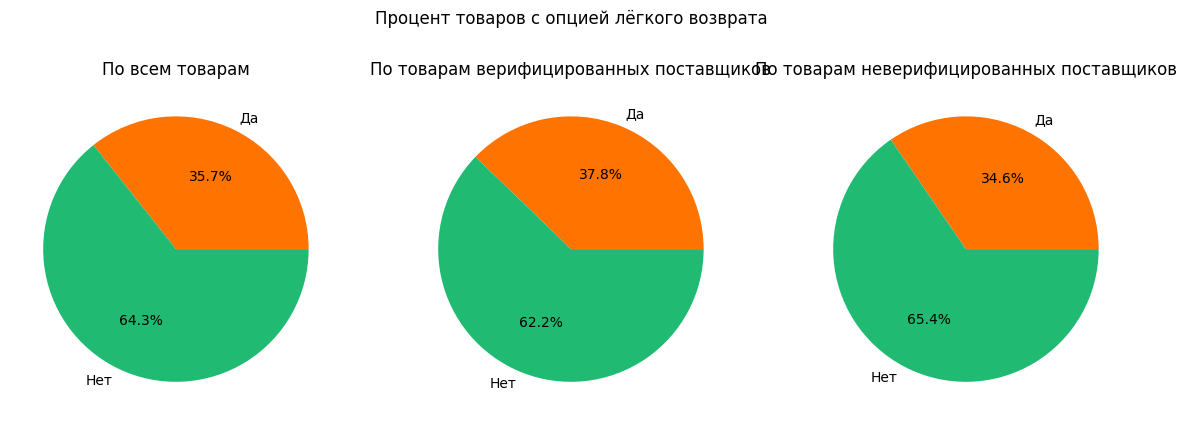

In [411]:
labels = ['Да', 'Нет']
all_df_sizes = [(df['easy_return'] == 1).sum(), (df['easy_return'] == 0).sum()]
verified_df_sizes = [(df_verified['easy_return'] == 1).sum(), (df_verified['easy_return'] == 0).sum()]
unverified_df_sizes = [(df_unverified['easy_return'] == 1).sum(), (df_unverified['easy_return'] == 0).sum()]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

fig.suptitle('Процент товаров с опцией лёгкого возврата', y=1.05)

axes[0].pie(all_df_sizes, labels=labels, autopct='%1.1f%%', colors=[palette[0], palette[2]], wedgeprops = {'linewidth': 0})
axes[0].set_title('По всем товарам')

axes[1].pie(verified_df_sizes, labels=labels, autopct='%1.1f%%', colors=[palette[0], palette[2]], wedgeprops = {'linewidth': 0})
axes[1].set_title('По товарам верифицированных поставщиков')

axes[2].pie(unverified_df_sizes, labels=labels, autopct='%1.1f%%', colors=[palette[0], palette[2]], wedgeprops = {'linewidth': 0})
axes[2].set_title('По товарам неверифицированных поставщиков')

plt.tight_layout()
plt.show()

### Наличие товаров с гарантией своевременной доставки.

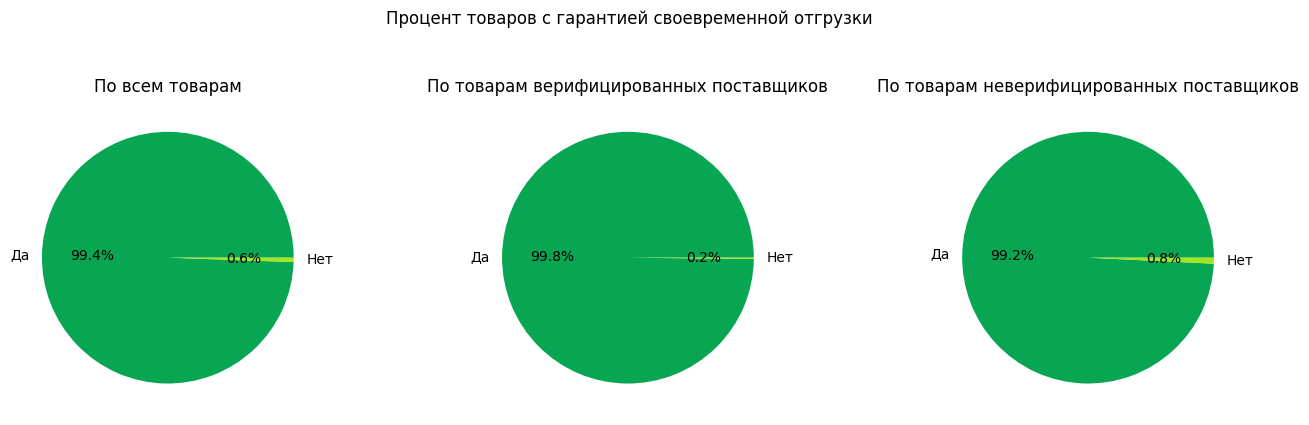

In [270]:
labels = ['Да', 'Нет']
all_df_sizes = [(df['on-time_shipment_guarantee'] == 1).sum(), (df['on-time_shipment_guarantee'] == 0).sum()]
verified_df_sizes = [(df_verified['on-time_shipment_guarantee'] == 1).sum(), (df_verified['on-time_shipment_guarantee'] == 0).sum()]
unverified_df_sizes = [(df_unverified['on-time_shipment_guarantee'] == 1).sum(), (df_unverified['on-time_shipment_guarantee'] == 0).sum()]

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

fig.suptitle('Процент товаров с гарантией своевременной отгрузки', y=1.05)

axes[0].pie(all_df_sizes, labels=labels, autopct='%1.1f%%', colors=[palette[3], palette[1]], wedgeprops = {'linewidth': 0})
axes[0].set_title('По всем товарам')

axes[1].pie(verified_df_sizes, labels=labels, autopct='%1.1f%%', colors=[palette[3], palette[1]], wedgeprops = {'linewidth': 0})
axes[1].set_title('По товарам верифицированных поставщиков')

axes[2].pie(unverified_df_sizes, labels=labels, autopct='%1.1f%%', colors=[palette[3], palette[1]], wedgeprops = {'linewidth': 0})
axes[2].set_title('По товарам неверифицированных поставщиков')

plt.tight_layout()
plt.show()

### Вывод

По круговым диаграммам процентного соотношения товаров с опцией легкого возврата видно, что только у 35.7% товаров поставщиков есть возможность лёгкого возврата, среди товаров только проверенных поставщиков процент товаров с гарантией лёгкого возврата на 2.1% больше, а у товаров непроверенных поставщиков на 1.1% меньше. В свою очередь на диаграммах с процентным соотношеним товаров с гарантией своевременной отгрузки видно, что гарантия своевременной отгрузки есть почти у каждого товара на платформе. Это говорит о том, что поставщики сервиса Alibaba ответственно относятся к своей работе, так как при наличии гарантии своевременной отгрузки, если поставщик не отгрузит товар в установленный срок, будет вынужден вернуть деньги заказчику.

# Аналитика по переменной supplier_rate

In [250]:
def group_rate(supplier_rate):        
    return round(supplier_rate)

df['grouped_rate'] = df['supplier_rate'].apply(group_rate)
df.head()

,product_name,category,supplier_name,supplier_category,is_verified,supplier_experience,supplier_rate,response_speed,on-time_delivery,on-time_shipment_guarantee,easy_return,min_count,max_count,mean_count,min_price,max_price,mean_price,grouped_rate
0,2023 детская пустышка,Другая бытовая электроника,"Shenzhen ESYS Electronics Co., Ltd.",Manufacturer,0,12,4.8,3,100.0,1,1,100.0,1000.0,550.0,9.0,12.0,10.0,5
1,Оптовая продажа Jakcom R3 умное кольцо Бытовая...,Другая бытовая электроника,"Shanxi Jakcom Technology Co., Ltd.",Trading Company,0,9,4.4,3,91.4,1,0,1.0,3000.0,1500.0,7.0,19.0,13.0,4
2,"2021 другая Бытовая электроника, лидер продаж,...",Другая бытовая электроника,"Xiamen Paltier Electronic Technology Co., Ltd.","Manufacturer,Trading Company",0,7,0.0,10,80.0,1,0,1000.0,10000.0,5500.0,11.0,13.0,12.0,0
3,"Оптовая продажа, универсальные аксессуары для ...",Другая бытовая электроника,"Dongguan Longrich Electronic Co., Ltd.",Производитель товаров по индивидуальному заказу,1,19,5.0,6,100.0,1,0,2.0,500.0,251.0,2.0,4.0,3.0,5
4,"Лидер продаж, универсальный стабилизатор G6MAX...",Другая бытовая электроника,"Foshan City Gaoming District Mibohe Trade Co.,...",Многопрофильный поставщик,1,8,4.9,6,100.0,1,0,2.0,20.0,11.0,223.0,279.0,251.0,5


## Распределение по рейтингу.

In [400]:
df_rate = df[['supplier_name', 'supplier_rate', 'grouped_rate', 'on-time_delivery', 'is_verified']].drop_duplicates()

df_rate_verified_1 = df_rate[df_rate['is_verified'] == 1]
df_rate_verified_0 = df_rate[df_rate['is_verified'] == 0]

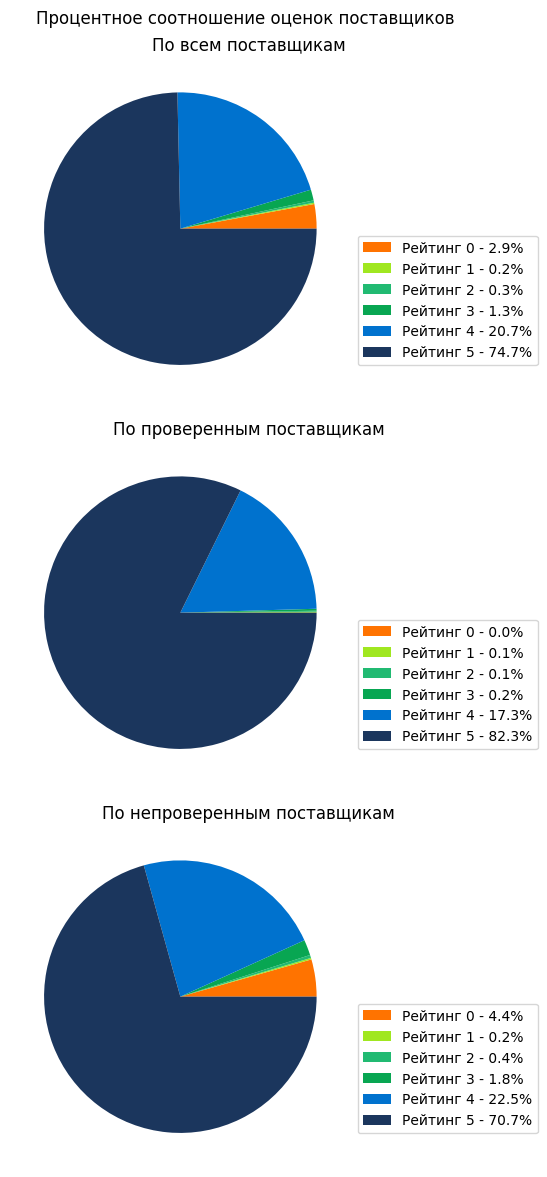

In [401]:
fig, axes = plt.subplots(3, 1, figsize=(5, 12))

rates_1 = [(df_rate['grouped_rate'] == rate_num).sum() for rate_num in range(6)]
axes[0].pie(rates_1, colors=palette, wedgeprops={'linewidth': 0})
axes[0].set_title('По всем поставщикам', x=0.7)
legend_labels_1 = ['Рейтинг {} - {:.1%}'.format(rate_num, rate / sum(rates_1)) for rate_num, rate in enumerate(rates_1)]
axes[0].legend(legend_labels_1, bbox_to_anchor=(1, 0.5))

rates_2 = [(df_rate_verified_1['grouped_rate'] == rate_num).sum() for rate_num in range(6)]
axes[1].pie(rates_2, colors=palette, wedgeprops={'linewidth': 0})
axes[1].set_title('По проверенным поставщикам', x=0.7)
legend_labels_2 = ['Рейтинг {} - {:.1%}'.format(rate_num, rate / sum(rates_2)) for rate_num, rate in enumerate(rates_2)]
axes[1].legend(legend_labels_2, bbox_to_anchor=(1, 0.5))

rates_3 = [(df_rate_verified_0['grouped_rate'] == rate_num).sum() for rate_num in range(6)]
axes[2].pie(rates_3, colors=palette, wedgeprops={'linewidth': 0})
axes[2].set_title('По непроверенным поставщикам', x=0.7)
legend_labels_3 = ['Рейтинг {} - {:.1%}'.format(rate_num, rate / sum(rates_3)) for rate_num, rate in enumerate(rates_3)]
axes[2].legend(legend_labels_3, bbox_to_anchor=(1, 0.5))

fig.suptitle('Процентное соотношение оценок поставщиков')

plt.tight_layout()
plt.show()

### Вывод

На круговой диаграмме распределения оценок по всем поставщикам видно, что большинство поставщиков (74,8%) имеют оценку 5. Также часто встречаются поставщики с оценкой 4 (20,7%). Количество поставщиков с рейтингом 0 составляется 2,9%, с рейтингом 3 – 1,3%. Реже всего встречаются оценки 1 (0,2%) и 2 (0,3%). В свою очередь в распределении оценок по проверенным поставщикам оценки ниже 4 составляют только 0.4%, а среди непроверенных поставщиков у 4.4% поставщиков рейтинг равен 0. Данные круговые диаграммы ещё раз наглядно показывают, что большинство поставщиков в Alibaba имеют положительные отзывы, а выбор проверенных сервисом поставщиков значительно понижает вероятность встретить некачественного поставщика.

## Зависимость процента своевременной доставки от рейтинга поставщика.

In [ ]:
sns.pairplot(df)
plt.show()

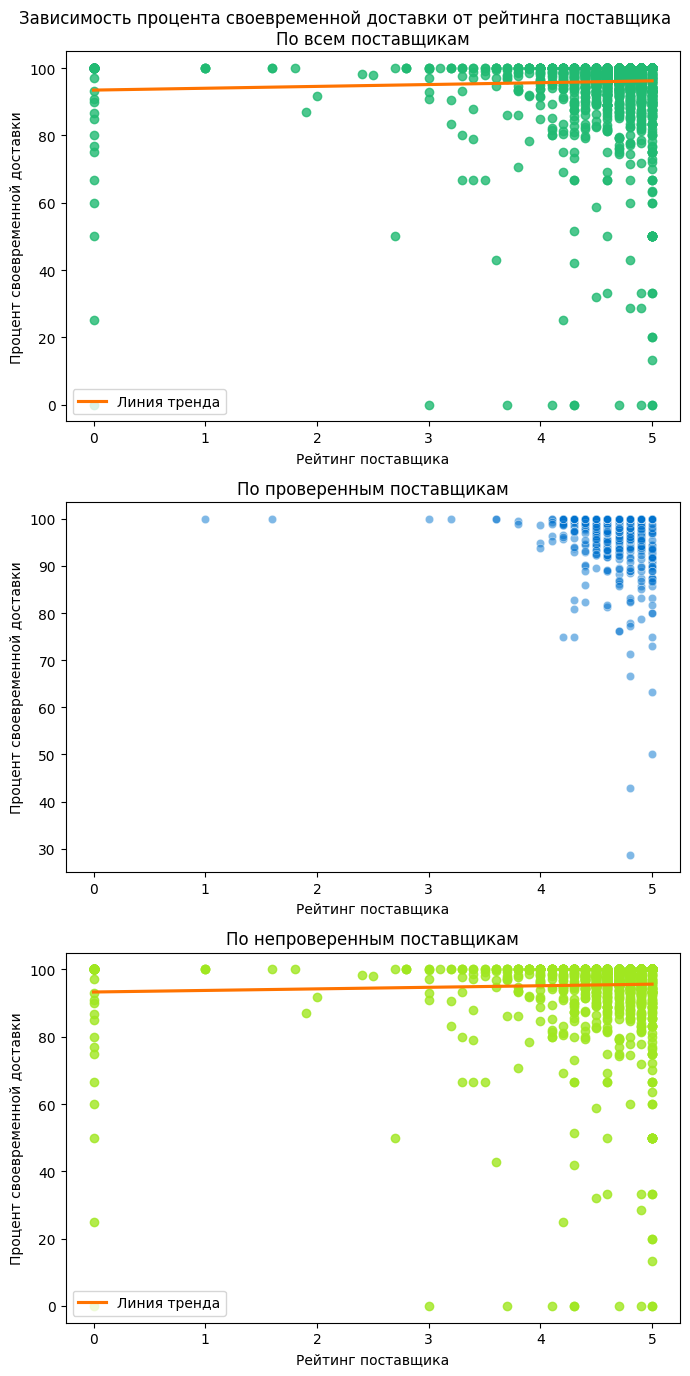

In [433]:
fig, axes = plt.subplots(3, 1, figsize=(7,14))

sns.regplot(data=df_rate, x='supplier_rate', y='on-time_delivery', color=palette[2], line_kws={"color": palette[0], 'label': 'Линия тренда'}, ci=None, ax=axes[0])
axes[0].set_title('По всем поставщикам')
axes[0].set_xlabel('Рейтинг поставщика')
axes[0].set_ylabel('Процент своевременной доставки')
axes[0].legend()

sns.scatterplot(data=df_rate_verified_1, x='supplier_rate', y='on-time_delivery', color=palette[4], alpha=0.5, ax=axes[1])
axes[1].set_title('По проверенным поставщикам')
axes[1].set_xlabel('Рейтинг поставщика')
axes[1].set_ylabel('Процент своевременной доставки')
axes[1].set_xlim(-0.25,5.25)

sns.regplot(data=df_rate_verified_0, x='supplier_rate', y='on-time_delivery', color=palette[1], line_kws={"color": palette[0], 'label': 'Линия тренда'}, ci=None, ax=axes[2])
axes[2].set_title('По непроверенным поставщикам')
axes[2].set_xlabel('Рейтинг поставщика')
axes[2].set_ylabel('Процент своевременной доставки')
axes[2].legend()

fig.suptitle('Зависимость процента своевременной доставки от рейтинга поставщика')

plt.tight_layout()

plt.show()

### Вывод

По диаграммам рассеяния видно, что независимо от рейтинга встречаются поставщики с процентом своевременной доставки ниже 50% или даже с 0%. Однако большинство значений лежит в диапазоне от 90% до 100%. Также линии тренда отображают, что с ростом рейтинга растёт и процент своевременной доставки. Стоит отметить, что у проверенных поставщиков разброс показателя процента своевременной доставки меньше.

## Зависимость рейтинга поставщика от гарантии своевременной отгрузки и опции easy return

In [398]:
df_options = df[['product_name','supplier_name', 'supplier_rate','grouped_rate', 'is_verified', 'on-time_shipment_guarantee', 'easy_return']]

df_options_verified_1 = df_options[df_options['is_verified'] == 1]
df_options_verified_0 = df_options[df_options['is_verified'] == 0]

## По гарантии своевременной отгрузки

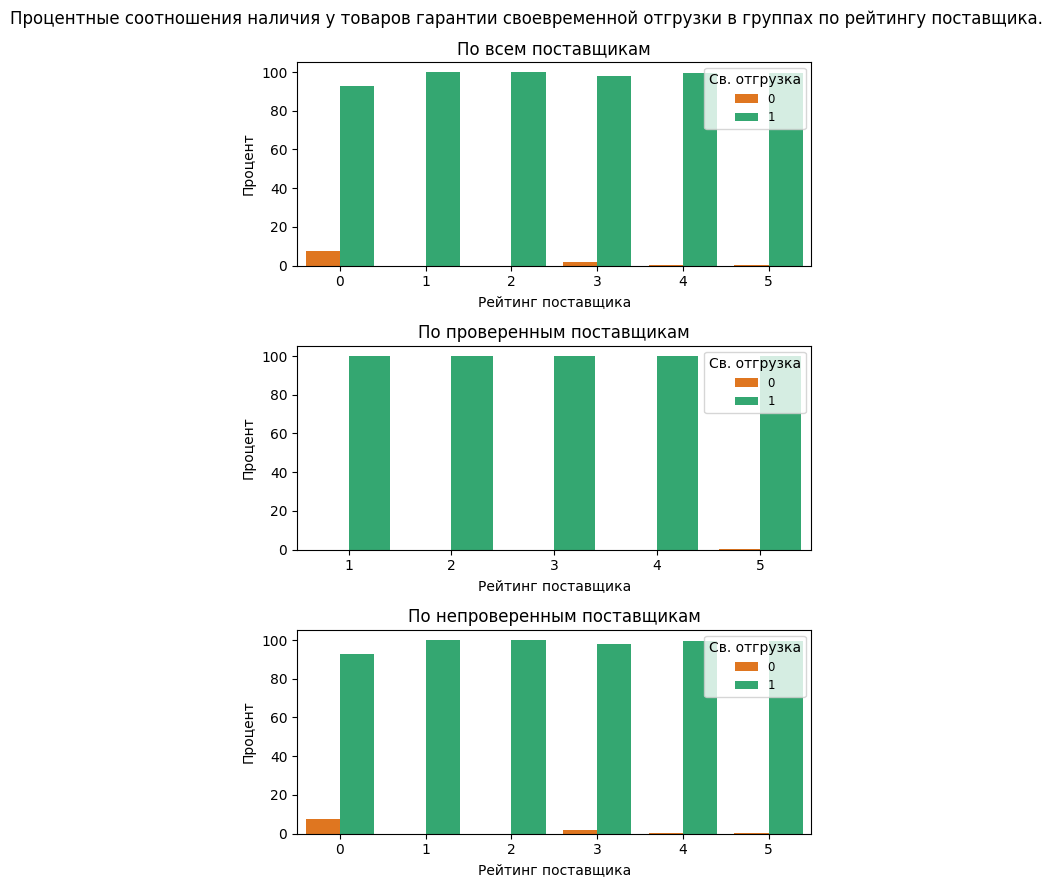

In [494]:
grouped_data = df_options.groupby(['grouped_rate', 'on-time_shipment_guarantee']).size().reset_index(name='count')
total_counts = grouped_data.groupby('grouped_rate')['count'].sum()
grouped_data['percentage'] = grouped_data.apply(lambda row: (row['count'] / total_counts[row['grouped_rate']]) * 100, axis=1)


grouped_data_1 = df_options_verified_1.groupby(['grouped_rate', 'on-time_shipment_guarantee']).size().reset_index(name='count')
total_counts_1 = grouped_data_1.groupby('grouped_rate')['count'].sum()
grouped_data_1['percentage'] = grouped_data_1.apply(lambda row: (row['count'] / total_counts_1[row['grouped_rate']]) * 100, axis=1)

grouped_data_0 = df_options_verified_0.groupby(['grouped_rate', 'on-time_shipment_guarantee']).size().reset_index(name='count')
total_counts_0 = grouped_data_0.groupby('grouped_rate')['count'].sum()
grouped_data_0['percentage'] = grouped_data_0.apply(lambda row: (row['count'] / total_counts_0[row['grouped_rate']]) * 100, axis=1)

fig, axes = plt.subplots(3, 1, figsize=(6, 9))

sns.barplot(x='grouped_rate', y='percentage', hue='on-time_shipment_guarantee', data=grouped_data, palette=[palette[0], palette[2]], ax=axes[0])
axes[0].set_title('По всем поставщикам')
axes[0].set_xlabel('Рейтинг поставщика')
axes[0].set_ylabel('Процент')
axes[0].legend(title='Св. отгрузка', fontsize='small')

sns.barplot(x='grouped_rate', y='percentage', hue='on-time_shipment_guarantee', data=grouped_data_1, palette=[palette[0], palette[2]], ax=axes[1])
axes[1].set_title('По проверенным поставщикам')
axes[1].set_xlabel('Рейтинг поставщика')
axes[1].set_ylabel('Процент')
axes[1].legend(title='Св. отгрузка', fontsize='small')

sns.barplot(x='grouped_rate', y='percentage', hue='on-time_shipment_guarantee', data=grouped_data_0, palette=[palette[0], palette[2]], ax=axes[2])
axes[2].set_title('По непроверенным поставщикам')
axes[2].set_xlabel('Рейтинг поставщика')
axes[2].set_ylabel('Процент')
axes[2].legend(title='Св. отгрузка', fontsize='small')

fig.suptitle('Процентные соотношения наличия у товаров гарантии своевременной отгрузки в группах по рейтингу поставщика.')

plt.tight_layout()
plt.show()

### Вывод

По столбчатым диаграммам распределения процентного соотношения наличия гарантии своевременной отгрузки в группах по рейтингу поставщика видно, что гарантия своевременной отгрузки есть почти у всех товаров в каждой группе рейтинга.  Однако у непроверенных поставщиков с рейтингом 0 около 10% товаров не имеют гарантию своевременной отгрузки. Также встречается небольшое количество товара без гарантии своевременной отгрузки у поставщиков с рейтингом 3, 4 и 5.

## По опции лёгкого возврата

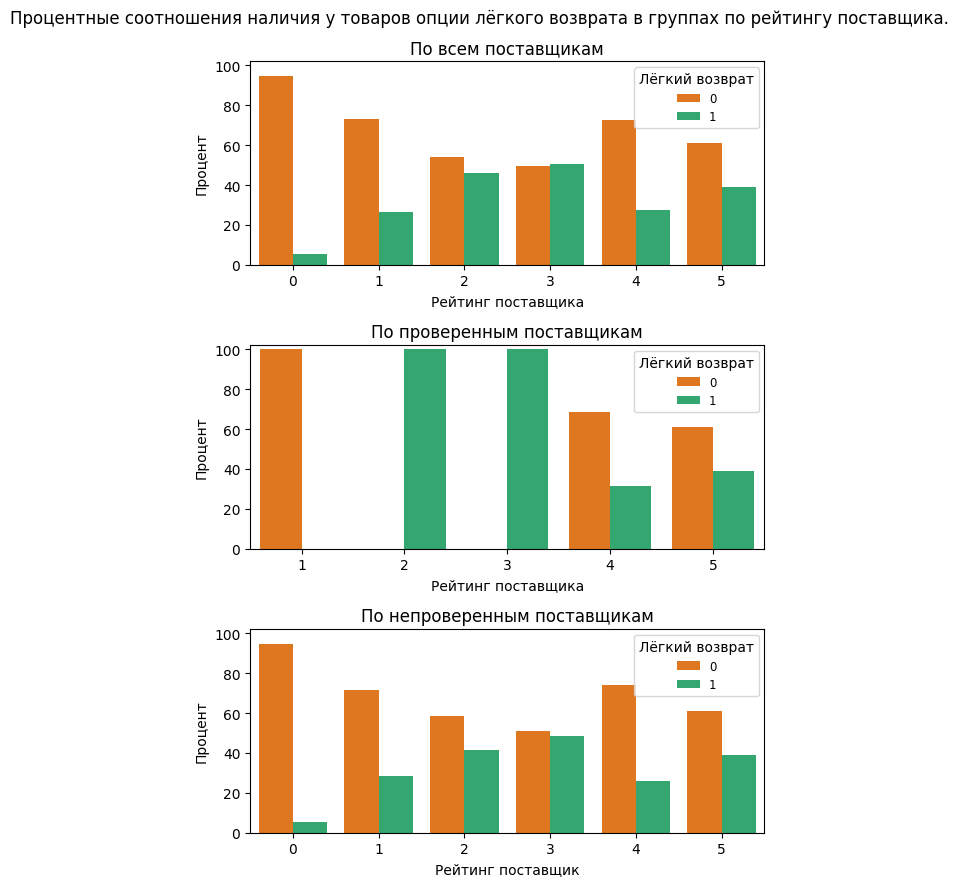

In [488]:
grouped_data = df_options.groupby(['grouped_rate', 'easy_return']).size().reset_index(name='count')
total_counts = grouped_data.groupby('grouped_rate')['count'].sum()
grouped_data['percentage'] = grouped_data.apply(lambda row: (row['count'] / total_counts[row['grouped_rate']]) * 100, axis=1)

grouped_data_1 = df_options_verified_1.groupby(['grouped_rate', 'easy_return']).size().reset_index(name='count')
total_counts_1 = grouped_data_1.groupby('grouped_rate')['count'].sum()
grouped_data_1['percentage'] = grouped_data_1.apply(lambda row: (row['count'] / total_counts_1[row['grouped_rate']]) * 100, axis=1)

grouped_data_0 = df_options_verified_0.groupby(['grouped_rate', 'easy_return']).size().reset_index(name='count')
total_counts_0 = grouped_data_0.groupby('grouped_rate')['count'].sum()
grouped_data_0['percentage'] = grouped_data_0.apply(lambda row: (row['count'] / total_counts_0[row['grouped_rate']]) * 100, axis=1)

fig, axes = plt.subplots(3, 1, figsize=(6, 9))

sns.barplot(x='grouped_rate', y='percentage', hue='easy_return', data=grouped_data, palette=[palette[0], palette[2]], ax=axes[0])
axes[0].set_title('По всем поставщикам')
axes[0].set_xlabel('Рейтинг поставщика')
axes[0].set_ylabel('Процент')
axes[0].set_ylim(0, 102)
axes[0].legend(title='Лёгкий возврат', fontsize='small', loc='upper right')

sns.barplot(x='grouped_rate', y='percentage', hue='easy_return', data=grouped_data_1, palette=[palette[0], palette[2]], ax=axes[1])
axes[1].set_title('По проверенным поставщикам')
axes[1].set_xlabel('Рейтинг поставщика')
axes[1].set_ylabel('Процент')
axes[1].set_ylim(0, 102)
axes[1].legend(title='Лёгкий возврат', fontsize='small', loc='upper right')

sns.barplot(x='grouped_rate', y='percentage', hue='easy_return', data=grouped_data_0, palette=[palette[0], palette[2]], ax=axes[2])
axes[2].set_title('По непроверенным поставщикам')
axes[2].set_xlabel('Рейтинг поставщик')
axes[2].set_ylabel('Процент')
axes[2].set_ylim(0, 102)
axes[2].legend(title='Лёгкий возврат', fontsize='small', loc='upper right')

fig.suptitle('Процентные соотношения наличия у товаров опции лёгкого возврата в группах по рейтингу поставщика.')

plt.tight_layout()
plt.show()

### Вывод

Столбчатые диаграммы показывают, что почти в каждой группе рейтинга поставщика преобладают товары без опции лёгкого возврата, исключение является группа поставщиков с рейтингом 3. Поставщики с рейтингом 0, 1 и 4 имеют больше всего товаров без опции лёгкого возврата, а поставщики с рейтингом 2, 3 и 5 имеют больше всего товаров с опцией лёгкого возврата.